# A Principle Component Analysis of Planetary Nebulae Properties

Principle component analysis (PCA) is a machine learning technique that allows us to observe correlations across large and varied datasets. As astrophysicists, we deal almost exclusively in large and varied datasets. When my colleague was plotting 2-D scatterplots between different parameters in a large and varied dataset, I wanted to see what I could find using PCA. 

Finis sent me the CSV file and will be attached with the submission. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
from sklearn.decomposition import PCA

# from astropy.io import ascii
# from astropy.table import Table
# I tried to use astropy but it didn't want to work as well as pandas

import pandas as pd


# <Table length=136>
#          name           dtype     class     n_bad
# ---------------------- ------- ------------ -----
#                   Name   str19       Column     0
#                     RA   str11       Column     0
#                    Dec   str12       Column     0
#            Other names   str80 MaskedColumn     1
#     Kinematic Age (yr)   int64 MaskedColumn    25
#  Central Star Temp (K)   int64 MaskedColumn    42
# Structure (Literature)   int64       Column     0
# Aspect Ratio (Overall) float64       Column     0
#    Opening Angle (Avg)    str5 MaskedColumn   100
#      PG Mass (Solar M) float64 MaskedColumn    78
#                 C(e-4) float64 MaskedColumn    83
#                 O(e-4) float64 MaskedColumn    70
#                    C/O float64 MaskedColumn    68
# Metallicity [O/H](e-4) float64 MaskedColumn    52
# Radial Velocity (km/s) float64       Column     0
#            Magnititude float64 MaskedColumn    31
#                    MAT float64 MaskedColumn    80
#              Mass/Temp float64 MaskedColumn    79
#                     MA   int64 MaskedColumn    78
#                    A/T float64 MaskedColumn    46
#                     TA   int64 MaskedColumn    47

df = pd.read_csv('pca_csv.csv')
print('The original shape of the data is ',df.shape)
# Loading the csv file into a pandas dataframe
df = df.dropna()
dmatrix = df[['Kinematic Age (yr)', 
                'Central Star Temp (K)', 
                'Aspect Ratio (Overall)',
                'PG Mass (Solar M)',
                'C(e-4)',
                'O(e-4)',
                'C/O',
                'Metallicity [O/H](e-4)',
                'Radial Velocity (km/s)',
                'Magnititude',
                'MAT',
                'Mass/Temp',
                'MA',
                'A/T',
                'TA']]
# Specifying which columns we're interested in


data = dmatrix.values
print('Array of complete data with shape ',data.shape)

The original shape of the data is  (136, 21)
Array of complete data with shape  (11, 15)


This shows us loading the csv file in, specifying the columns we want (it's probably easy to rule out any correlation with the star's name), dropping any rows with missing data. Unfortunately, due to dropping all but 11 planetary nebulae, our data cannot be expected to converge. But, might as well keep going.

We now do the calculation taken from pcademo3.py

In [38]:
mean = np.nanmean(data,axis=0)                       

mean_data = data-mean                                # Mean-Center the Data

cov = np.matmul(mean_data.T, mean_data)              # Compute Covariance Matrix

eig_val, eig_vec = np.linalg.eigh(cov)               # Eigen-decompose the covariance matrix

indices = np.argsort(eig_val)[::-1]                  # Sort the Eigenvalues and Eigenvectors from largest to smallest 
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]

sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val

print("Explained variance ", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance ", cumulative_variance)


Explained variance  [ 9.99999983e-01  1.69693303e-08  4.77420583e-11  1.92276166e-12
  5.77091086e-16  2.96864921e-17  7.15832091e-18  2.71900416e-18
  1.09749668e-18  7.57227153e-20  2.70305009e-28  1.79406636e-40
 -9.50571341e-30 -1.39982795e-24 -8.38101585e-24]
Cumulative variance  [0.99999998 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


This shows that most of the variance can be explained by just one principle component. This is further demonstrated with the plot below.

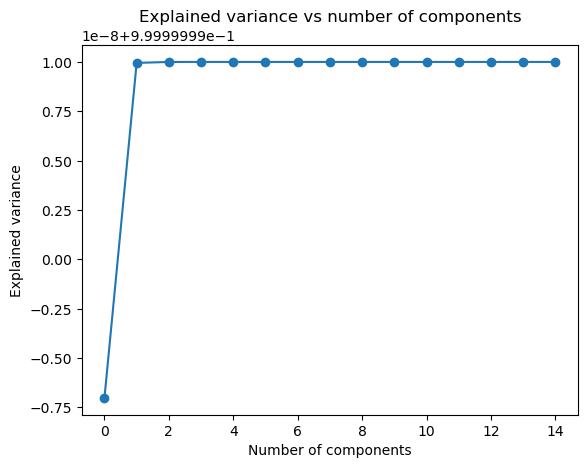

In [12]:
fig, ax = plt.subplots()
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance,marker='o')
plt.title("Explained variance vs number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()


Lets run it with 2 just for fun 

In [42]:
n_comp = 2
eig_vec = eig_vec[:,:n_comp]
eig_val=eig_val[:n_comp]
print('eig vec shape ',eig_vec.shape)
pca_data = mean_data.dot(eig_vec)



eig vec shape  (15, 2)


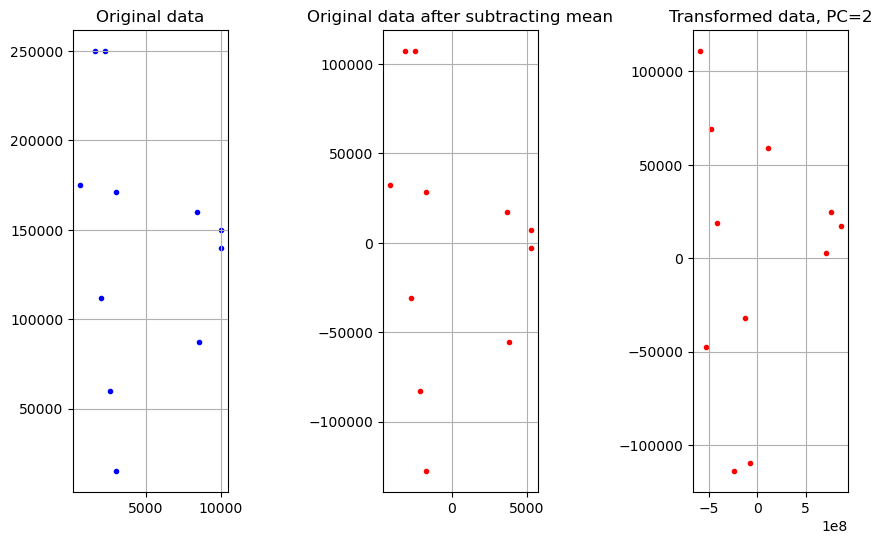

In [44]:
fig2, ax2 = plt.subplots(1,3, figsize= (10,6))
fig2.subplots_adjust(wspace=1.0)
  # Plot original data
ax2[0].scatter(data[:,0], data[:,1], color='blue', marker='.')

  # Plot data after subtracting mean from data
ax2[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

  # Plot pca data 
ax2[2].scatter(pca_data[:,0], pca_data[:,1], color='red', marker='.')

  # Set title
ax2[0].set_title("Original data")
ax2[1].set_title("Original data after subtracting mean")
ax2[2].set_title("Transformed data, PC="+str(n_comp))

  # Set x ticks
# ax[0].set_xticks(np.arange(-8, 1, 8))
# ax[1].set_xticks(np.arange(-8, 1, 8))
# ax[2].set_xticks(np.arange(-8, 1, 8))

  # Set grid to 'on'
ax2[0].grid('on')
ax2[1].grid('on')
ax2[2].grid('on')

  #major_axis = eig_vec[:,0].flatten()
# xmin = np.amin(pca_data[:,0])
# xmax = np.amax(pca_data[:,0])
# ymin = np.amin(pca_data[:,1])
# ymax = np.amax(pca_data[:,1])

plt.show()


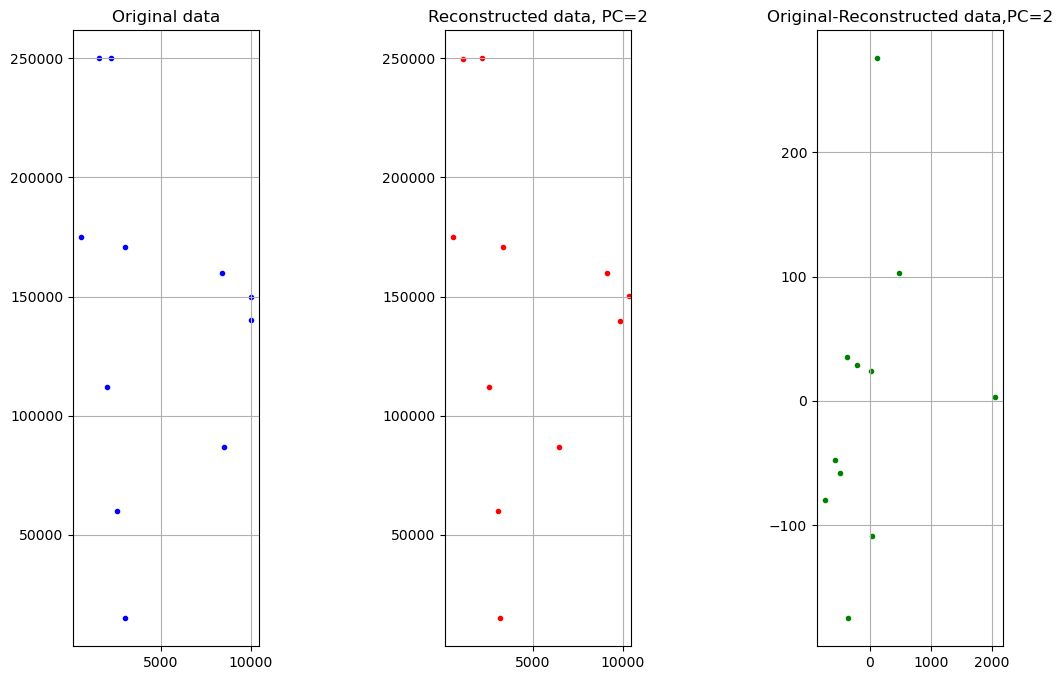

In [18]:
recon_data = pca_data.dot(eig_vec.T) + mean


fig3, ax3 = plt.subplots(1,3, figsize= (12, 8))
fig3.subplots_adjust(wspace=1)
ax3[0].scatter(data[:,0], data[:,1], color='blue', marker='.')
xl=ax3[0].get_xlim()
yl=ax3[0].get_ylim()

ax3[1].scatter(recon_data[:,0], recon_data[:,1], color='red', marker='.')
ax3[1].set_xlim(xl)
ax3[1].set_ylim(yl)

ax3[2].scatter(data[:,0]-recon_data[:,0], data[:,1]-recon_data[:,1], color='green', marker='.')
# ax3[2].set_xlim(xl)
# ax3[2].set_ylim(yl)

ax3[0].set_title("Original data")
ax3[1].set_title("Reconstructed data, PC="+str(n_comp))
ax3[2].set_title("Original-Reconstructed data,PC="+str(n_comp))
ax3[0].grid('on')
ax3[1].grid('on')
ax3[2].grid('on')
plt.show()
